# Generate Actor Dataframes
This code will load the actors list from the wikipedia scraper JSON file, create a dataframe with them. Then we create a second dataframe from the CSV file of black actors, also from wikipedia, and we use regex to remove some of the elements that this one has that are irrelevant and must be removed to compare both dataframes. Lastly we do the comparison, giving a table with the actors name, and a 0 if they are no black, a 1 if they are

In [19]:
import pandas as pd
import json
from pandas import json_normalize
import os
import regex as re
import matplotlib.pyplot as plt

# OPut your absolute pat to the project here
project_path = '/home/jorge/Insync/jorgitoje@gmail.com/OneDrive/Documentos/JORGE/EDUCATION/MASTER_DATASCIENCE/Semester1/DataintheWild/GroupProject/DITW_project'

df = pd.read_json(os.path.join(project_path, 'data/metadata/movies_metadata.json'), 
                    encoding='latin-1')

# create a actor dataframe consisting of the json information plus each movie they appear
actor_df = (df[df.index.isin( ['actors','title'])]
            .T
            .explode('actors')
            .reset_index())

actor_df.head

<bound method NDFrame.head of     index                           title                     actors
0       1  The Little Mermaid (2023 film)               Halle Bailey
1       1  The Little Mermaid (2023 film)           Jonah Hauer-King
2       1  The Little Mermaid (2023 film)               Daveed Diggs
3       1  The Little Mermaid (2023 film)             Jacob Tremblay
4       1  The Little Mermaid (2023 film)                  Awkwafina
..    ...                             ...                        ...
78      7              Mad Max: Fury Road  Rosie Huntington-Whiteley
79      7              Mad Max: Fury Road               Riley Keough
80      7              Mad Max: Fury Road               ZoÃ« Kravitz
81      7              Mad Max: Fury Road                  Abbey Lee
82      7              Mad Max: Fury Road             Courtney Eaton

[83 rows x 3 columns]>

In [20]:
# Create second dataframe, with actors that are not white
# relative path, comment the other one if wish to change
#black_actor_path = 'data/actors.csv' 
black_actor_path = os.path.join(project_path, '/data/actors.csv')

black_actor_df = pd.read_csv(black_actor_path, on_bad_lines='skip', encoding="utf-8")

# Remove special characters from the dataframe so we only have the actors names, as it appears
# on the other dataframe, otherwise the strings will be different and we wont be able to tell
# which are which
black_actor_df['actor_id'] = black_actor_df['actor_id'].str.split(' ').str[:2].str.join(' ')
black_actor_df['actor_id'] = black_actor_df['actor_id'].str.extract('(^[^\(|^\-]+)')

black_actor_df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/data/actors.csv'

In [8]:
# See if the actors from one dataframe appear in the other, if they do add a 1 to the column on the 
# right. This column is changed, as well as the title column, to better match their descriptions
#labeled_actor_df = actor_df.assign(indf=actor_df['actors'].isin(black_actor_df['actor_id'].str.extract(
#                    '(.*)(?=\s[-–])', expand=False)).astype(int))

labeled_actor = actor_df.assign(indf=actor_df['actors'].isin(black_actor_df['actor_id']).astype(int))

# Change name of column
labeled_actor = labeled_actor.rename(columns = {'title': 'movie_title', 'indf': 'not_white'})
labeled_actor.head(50)


,index,movie_title,actors,not_white
0,1,The Little Mermaid (2023 film),Halle Bailey,1
1,1,The Little Mermaid (2023 film),Jonah Hauer-King,0
2,1,The Little Mermaid (2023 film),Daveed Diggs,1
3,1,The Little Mermaid (2023 film),Jacob Tremblay,0
4,1,The Little Mermaid (2023 film),Awkwafina,1
5,1,The Little Mermaid (2023 film),Art Malik,1
6,1,The Little Mermaid (2023 film),Noma Dumezweni,1
7,1,The Little Mermaid (2023 film),Javier Bardem,0
8,1,The Little Mermaid (2023 film),Melissa McCarthy,0
9,2,Ghost in the Shell (2017 film),Scarlett Johansson,0


In [23]:
# Save dataframe as csv file
labeled_actor.to_csv(os.path.join(project_path,'data/actor_race.csv'), sep=';', index = False)



Text(0, 0.5, 'Number of non-white actors')

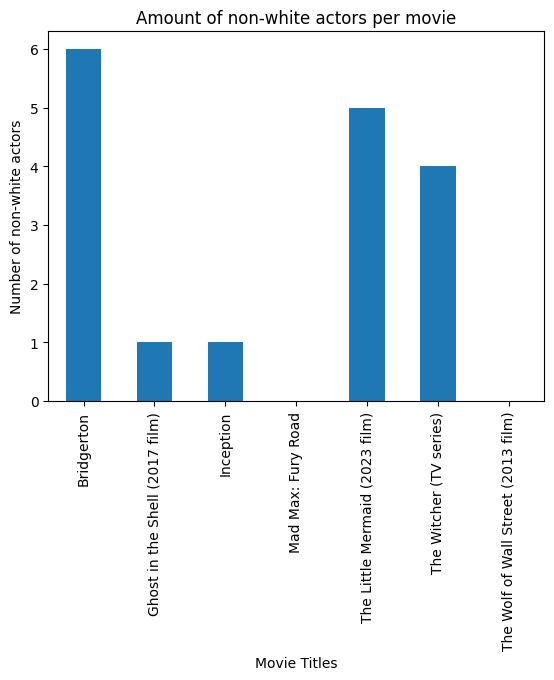

In [24]:
# Display amount of actors that are not white per movie
labeled_actor.groupby('movie_title')['not_white'].sum().plot.bar()
plt.title('Amount of non-white actors per movie')
plt.xlabel('Movie Titles')
plt.ylabel('Number of non-white actors')



In [ ]:
# Halle Bailey, Daveed Diggs, Awkwafina, Art Malik, Noma Dumezweni, Takeshi Kitano, Zoe Kravitz
# Jeffrey Wright, Anya Chalotra, Mimi Ndiweni, Anna Shaffer, Idris Elba, Adjoa Andoh, Ruby Barker,
# Regé-Jean Page, Simone Ashley, Charithra Chandran, Shelley Conn, Martins Imhangbe, Ken Watanabe